# Итоговая аттестационная(проектная) работа

## Цели и задачи итоговой проектной работы:

Целью работы является создание
алгоритмов машинного обучения, которые можно было бы применять в пищевой
промышленности для оценки качества рецептуры разрабатываемого шоколада, а также
регрессионной модели, которая может применяться для бесконтактного измерения массы
рыбы, выращиваемой на специализированных фермах.

При этом стоит отметить, что целью работы не является разработка
робототехнического комплекса для бесконтактного определения массы рыбы по её
размеру и другим параметрам, речь идёт лишь о регрессионной модели, которая лежит в
основе такого комплекса, то есть принимает на вход длину и ширину рыбы, а также
другие параметры, а на выходе делает предсказания, касающиеся массы рыбы.
Задачами работы являются:
1. Загрузка данных;
2. Их предобработка;
3. Обучение регрессионной модели предсказания массы рыбы;
4. Обучение модели классификации для предсказания качества рецептуры
разрабатываемого шоколада рецептуры.

### Задание 1


Получение данных
1. Импортируем библиотеку pandas.
2. Используем библиотеку pandas для того, чтобы считать данные из CSV
файла Chocolate_data_final.csv.
3. Выведим на экран первые 10 строк датасета.
4. Получим список колонок и сохраним его в отдельную переменную.
5. Пройдем в цикле по элементам списка колонок и выведим на печать
названия каждой колонки, а также уникальные значения, которые содержатся в ней.
6. В этом же цикле применим функцию для подсчёта количества значений
NAN в каждом столбце.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Chocolate_data_final.csv')

In [ ]:
df.head(10)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,NaN,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,NaN,Peru


In [ ]:
col=df.columns.tolist()
for i in col:
    print (i, ' ', df[i].unique())
    print ('В колонке ', i, ' - количество значений NaN:', df[i].isna().sum(), '\n')

Company (Maker-if known)   ['A. Morin' 'Acalli' 'Adi' 'Aequare (Gianduja)' 'Ah Cacao'
 'Akessons (Pralus)' 'Alain Ducasse' 'Alexandre' 'Altus aka Cao Artisan'
 'Amano' 'Amatller (Simon Coll)' 'Amazona' 'Ambrosia' 'Amedei' 'AMMA'
 'Anahata' 'Animas' 'Ara' 'Arete' 'Artisan du Chocolat'
 'Artisan du Chocolat (Casa Luker)' 'Askinosie' 'Bahen & Co.' 'Bakau'
 'Bar Au Chocolat' 'Baravellis' 'Batch' 'Beau Cacao' 'Beehive' 'Belcolade'
 'Bellflower' 'Belyzium' 'Benoit Nihant' 'Bernachon' 'Beschle (Felchlin)'
 'Bisou' 'Bittersweet Origins' 'Black Mountain' 'Black River (A. Morin)'
 'Blanxart' 'Blue Bandana' 'Bonnat' 'Bouga Cacao (Tulicorp)' 'Bowler Man'
 'Brasstown aka Its Chocolate' 'Brazen' 'Breeze Mill' 'Bright' 'Britarev'
 'Bronx Grrl Chocolate' 'Burnt Fork Bend' 'Cacao Arabuco' 'Cacao Atlanta'
 'Cacao Barry' 'Cacao de Origen' 'Cacao de Origin' 'Cacao Hunters'
 'Cacao Market' 'Cacao Prieto' 'Cacao Sampaka' 'Cacao Store'
 'Cacaosuyo (Theobroma Inversiones)' 'Cacaoyere (Ecuatoriana)' 'Callebaut

### Задание 2

Первичный анализ данных
1. Импортируем библиотеку pandas.
2. Используем библиотеку pandas для того, чтобы считать данные из CSV
файла (файл - Chocolate_data_final.csv).
3. Применим функцию describe() для описания датасета.
4. В данных есть числовые значения. Отыщим в
данных колонки с числовыми значениями (float/integer).
5. Переведём эти данные в числовой формат. Для этого необходимо
выполнить два действия:

-удалить знак процентов;

-преобразовать оставшееся строковое значение к числовому.

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount ('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Chocolate_data_final.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.describe()

,REF,Review Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [ ]:
df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru


In [ ]:
cif=[col for col in df.columns.tolist() if df[col].dtype not in ['object','<M8[ns]']]

print(cif)
['REF', 'Review Date', 'Rating']

df['Cocoa Percent'] = df['Cocoa Percent'].replace(to_replace ='%', value = '', regex = True)

df['Cocoa Percent']=df['Cocoa Percent'].astype('float')

df.head()

['REF', 'Review Date', 'Rating']


,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,NaN,Peru


### Задание 3

Обучение регрессионной модели предсказания массы рыбы
1. Загрузим приложенный к заданию файл fish_final.csv.
2. Загрузим необходимые библиотеки.
3. Установим переменную RS (random_state = 7092022).
4. Разделим данные на 2 выборки (тренировочную и тестовую с параметрами:
test_size=0.2, random_state = RS).
5. Построим матрицу корреляций: оценим, какие признаки мы будем
использовать в модели, а какие - нет.
6. Используем масштабирование данных (X) при помощи StandartScaller().
7. Построим модель множественной линейной регрессии.
8. Для оценки качества модели используем метрику скорректированного R^2
(Adj_r2).
9. Выведем коэффициенты при модели (только при переменных) - метод
.coef_ (применяется к обученной модели).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import model_selection, datasets, linear_model, metrics
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fish_final.csv')

In [ ]:
RS = 7092022

df


,Species,Weight,Length,Height,Width,Days,Gender
0,Bream,242.0,30.0,11.5200,2.140856,44.950718,0
1,Bream,290.0,31.2,12.4800,3.360002,54.654179,0
2,Bream,340.0,31.1,12.3778,4.201341,25.640887,0
3,Bream,363.0,33.5,12.7300,4.256410,98.547205,0
4,Bream,430.0,34.0,12.4440,3.365465,22.916053,0
...,...,...,...,...,...,...,...
154,Smelt,12.2,13.4,2.0904,1.570531,69.382337,0
155,Smelt,13.4,13.5,2.4300,1.067697,14.053050,0
156,Smelt,12.2,13.8,2.2770,0.642858,79.845063,0
157,Smelt,19.7,15.2,2.8728,0.921837,86.387484,0


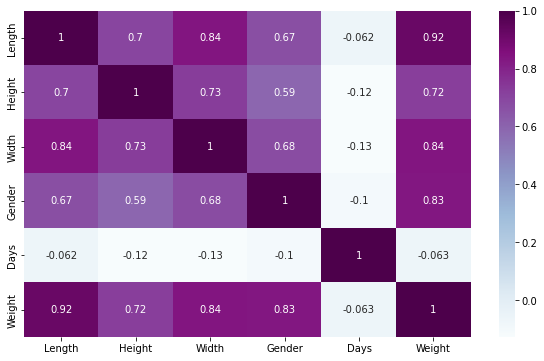

In [ ]:
df_comf = df[['Length', 'Height', 'Width', 'Gender', 'Days', 'Weight']]
plt.figure(figsize=(10, 6))
sns.heatmap(df_comf.corr(), annot=True, cmap = 'BuPu')
plt.show()

In [ ]:
x = df[['Length', 'Height', 'Width', 'Gender', 'Days']]
y = df['Weight']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = RS)
x_train.head()


,Length,Height,Width,Gender,Days
115,39.3,10.5717,5.087002,1,70.328776
82,22.5,5.6925,3.679746,0,49.942385
116,41.4,11.1366,6.118874,1,30.638290
55,28.7,8.3804,3.181512,0,91.220049
89,23.5,5.8750,1.711466,0,65.221502


In [ ]:
y_train.head()

115    690.0
82     110.0
116    900.0
55     270.0
89     135.0
Name: Weight, dtype: float64

In [ ]:
sc_x = StandardScaler()
x_train_scalled = sc_x.fit_transform(x_train)
x_test_scalled = sc_x.transform(x_test)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
reg.coef_

array([ 16.92048779,   4.55317626,  16.76969703, 317.7916725 ,
         0.5528941 ])

In [ ]:
def regression_results(y_true, y_pred, n, p):
   # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('Adj_r2: ', round(1-(1-r2)*(n-1)/(n-p-1),4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

y_pr = reg.predict(x_test)

regression_results(y_test, y_pr, x_test_scalled.shape[0], x_test_scalled.shape[1])



Adj_r2:  0.9172
r2:  0.9305
MAE:  64.3336
MSE:  9648.246
RMSE:  98.2255


In [ ]:
reg.coef_

array([ 16.92048779,   4.55317626,  16.76969703, 317.7916725 ,
         0.5528941 ])

In [ ]:
x = df[['Length', 'Height', 'Width', 'Gender']]
y = df['Weight']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = RS)

sc_x = StandardScaler()
x_train_scalled = sc_x.fit_transform(x_train)
x_test_scalled = sc_x.transform(x_test)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

y_pr = reg.predict(x_test)

regression_results(y_test, y_pr, x_test_scalled.shape[0], x_test_scalled.shape[1])

Adj_r2:  0.9242
r2:  0.934
MAE:  64.1076
MSE:  9172.9632
RMSE:  95.7756


In [ ]:
reg.coef_

array([ 17.28043436,   4.2427348 ,  14.55583428, 317.26652491])

In [ ]:
x = df[['Length', 'Gender']]
y = df['Weight']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = RS)

sc_x = StandardScaler()
x_train_scalled = sc_x.fit_transform(x_train)
x_test_scalled = sc_x.transform(x_test)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

y_pr = reg.predict(x_test)

regression_results(y_test, y_pr, x_test_scalled.shape[0], x_test_scalled.shape[1])

Adj_r2:  0.931
r2:  0.9354
MAE:  68.4779
MSE:  8964.8529
RMSE:  94.6829


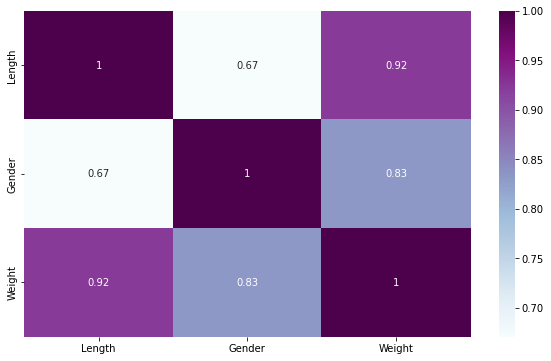

In [ ]:
df_comf = df[['Length', 'Gender', 'Weight']]
plt.figure(figsize=(10, 6))
sns.heatmap(df_comf.corr(), annot=True, cmap = 'BuPu')
plt.show()

In [ ]:
reg.coef_

array([ 19.67821789, 340.03905481])

### Задание 4

Обучение модели классификации для предсказания качества рецептуры
разрабатываемого шоколада рецептуры
1. Используем набор данных Chocolate_data_final_cl.csv.
2. Обучим любой классификатор, построим матрицу ошибок и на
отложенной выборке.
3. Рассчитаем метрики:
    
precision;

recall;

f1-score;

ROC_AUC.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from pprint import pprint
from sklearn import tree
RS = 7092022

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Chocolate_data_final_cl.csv')

In [ ]:
df

,Unnamed: 0,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,0,A. Morin,Agua Grande,1876,2016,0.63,France,1.0,NaN,Sao Tome
1,1,A. Morin,Kpime,1676,2015,0.70,France,0.0,NaN,Togo
2,2,A. Morin,Atsane,1676,2015,0.70,France,0.0,NaN,Togo
3,3,A. Morin,Akata,1680,2015,0.70,France,1.0,NaN,Togo
4,4,A. Morin,Quilla,1704,2015,0.70,France,1.0,NaN,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1790,Zotter,Peru,647,2011,0.70,Austria,1.0,NaN,Peru
1791,1791,Zotter,Congo,749,2011,0.65,Austria,0.0,Forastero,Congo
1792,1792,Zotter,Kerala State,749,2011,0.65,Austria,1.0,Forastero,India
1793,1793,Zotter,Kerala State,781,2011,0.62,Austria,1.0,NaN,India


In [ ]:
df = df.drop(columns=['REF', 'Unnamed: 0', 'Company (Maker-if known)', 'Specific Bean Origin or Bar Name', 'Bean Type', 'Broad Bean Origin'], axis=1)

In [ ]:
df

,Review Date,Cocoa Percent,Company Location,Rating
0,2016,0.63,France,1.0
1,2015,0.70,France,0.0
2,2015,0.70,France,0.0
3,2015,0.70,France,1.0
4,2015,0.70,France,1.0
...,...,...,...,...
1790,2011,0.70,Austria,1.0
1791,2011,0.65,Austria,0.0
1792,2011,0.65,Austria,1.0
1793,2011,0.62,Austria,1.0


In [ ]:
df.shape

(1795, 4)

In [ ]:
ohe = OneHotEncoder(sparse=False)
encoded_state = ohe.fit_transform(df['Company Location'].values.reshape(-1, 1))
tmp = pd.DataFrame(encoded_state,
                   columns=['Company Location' + str(i) for i in range(encoded_state.shape[1])])
df = pd.concat([df, tmp], axis=1)
df = df.drop('Company Location', axis=1)
df.head()


,Review Date,Cocoa Percent,Rating,Company Location0,Company Location1,Company Location2,Company Location3,Company Location4,Company Location5,Company Location6,...,Company Location50,Company Location51,Company Location52,Company Location53,Company Location54,Company Location55,Company Location56,Company Location57,Company Location58,Company Location59
0,2016,0.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,0.70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,0.70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Confusion matrix, without normalization
[[ 79 119]
 [ 59 192]]


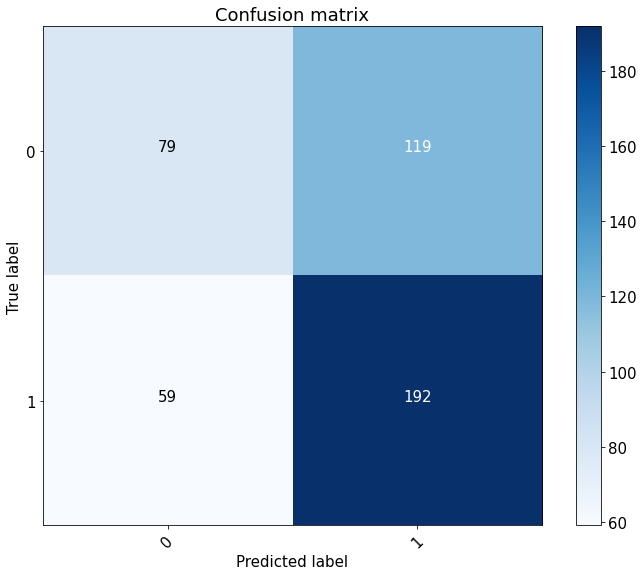

In [ ]:
X = df.drop('Rating', axis=1)
y = df['Rating']

# Делим выборку на train и test, все метрики будем оценивать на тестовом датасете

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.25, random_state=RS)

sc_x = StandardScaler()
X_train_scalled = sc_x.fit_transform(X_train)
X_test_scalled = sc_x.transform(X_test)

lr = LogisticRegression(random_state=RS)
lr.fit(X_train_scalled, y_train)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, lr.predict(X_test_scalled))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show();

In [ ]:
report = classification_report(y_test, lr.predict(X_test_scalled),\
                                            target_names=['0', '1'])

print(report)
print("ROC_AUC", roc_auc_score(y_test, lr.predict_proba(X_test_scalled)[:,1]))


              precision    recall  f1-score   support

           0       0.57      0.40      0.47       198
           1       0.62      0.76      0.68       251

    accuracy                           0.60       449
   macro avg       0.59      0.58      0.58       449
weighted avg       0.60      0.60      0.59       449

ROC_AUC 0.6247333896736287


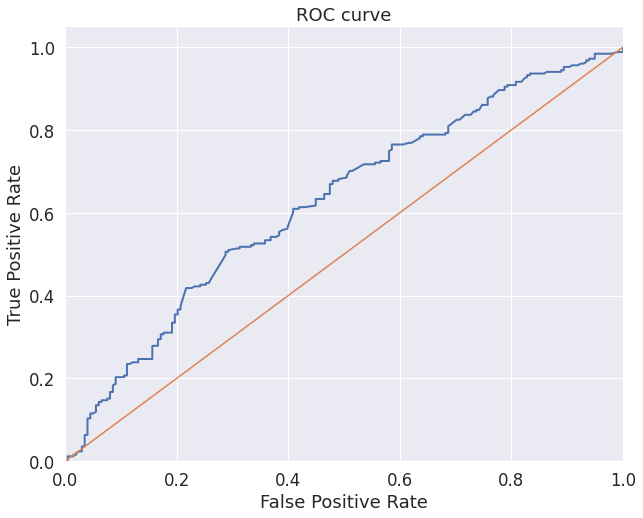

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test_scalled)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()


In [ ]:
clf = tree.DecisionTreeClassifier(random_state=RS)
clf.fit(X_train_scalled, y_train)

DecisionTreeClassifier(random_state=7092022)

Confusion matrix, without normalization
[[121  77]
 [ 84 167]]


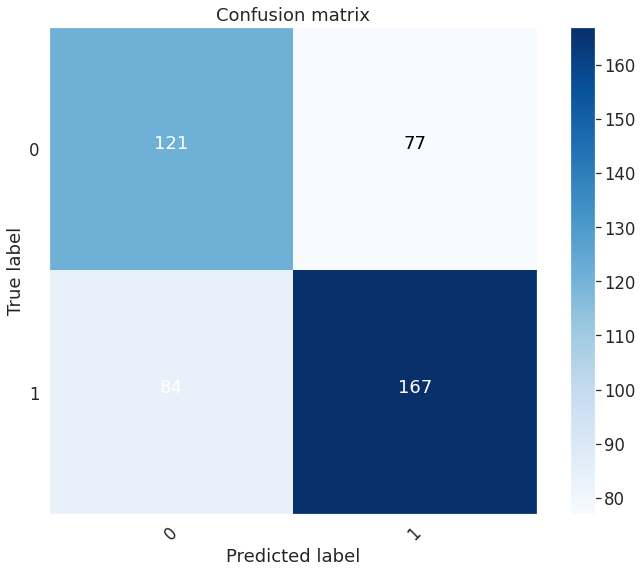

In [ ]:
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test_scalled))
plt.figure(figsize=(10, 8))
plt.rcParams['axes.grid'] = False
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix')

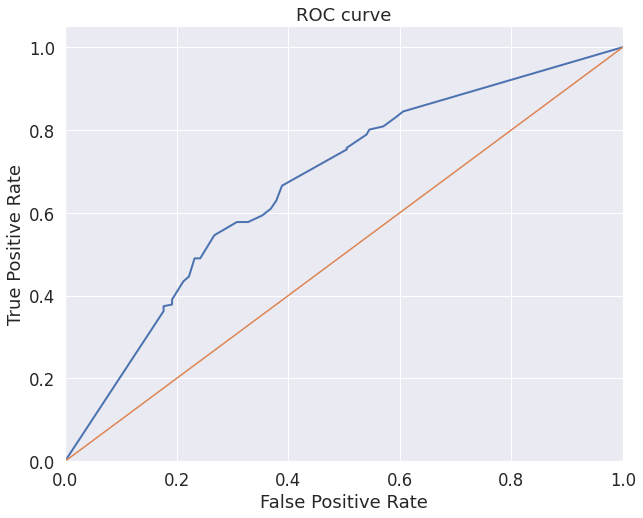

In [ ]:

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test_scalled)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()


In [ ]:
report = classification_report(y_test, clf.predict(X_test_scalled),\
                                            target_names=['0', '1'])

print(report)
print("ROC_AUC", roc_auc_score(y_test, clf.predict_proba(X_test_scalled)[:,1]))



              precision    recall  f1-score   support

           0       0.59      0.61      0.60       198
           1       0.68      0.67      0.67       251

    accuracy                           0.64       449
   macro avg       0.64      0.64      0.64       449
weighted avg       0.64      0.64      0.64       449

ROC_AUC 0.6709424926556401


## Заключение
В работе рассмотрены вопросы, посвященные применению анализа данных и
машинного обучения к задачам пищевой промышленности.
Как показала данная проектная работа потенциал применения технологий
искусственного интеллекта и анализа данных к задачам производства более качественной
продукции, а также к автоматизации некоторых его процессов достаточно высок.